Lets prepare our notebook by importing the necessary libs and dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df = pd.read_csv('../data/breast-cancer/wdbc.data',
                           sep=',',
                           header=None)

df.columns=['id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness', 'worst concavity',
 'worst concave points', 'worst symmetry', 'worst fractal dimension']

# We remove the id column as it's useless for any data exploration
df.drop('id', axis=1, inplace=True)

os.makedirs('plots/9-matplotlib_other_plots', exist_ok=True)

Example of creating a Histogram plot

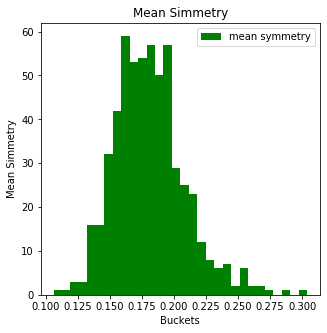

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.hist(df['mean symmetry'], bins=30, color='g', label='mean symmetry')
axes.set_title('Mean Simmetry')
axes.set_xlabel('Buckets')
axes.set_ylabel('Mean Simmetry')
axes.legend()

Example of creating a Pie plot

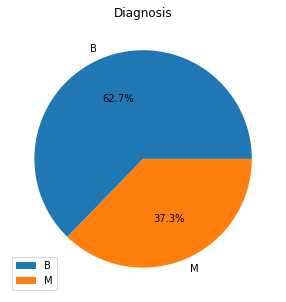

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.pie(df['diagnosis'].value_counts(), labels=df['diagnosis'].value_counts().index.tolist(), autopct='%1.1f%%')
axes.set_title('Diagnosis')
axes.legend()

Example of creating a Bar plot

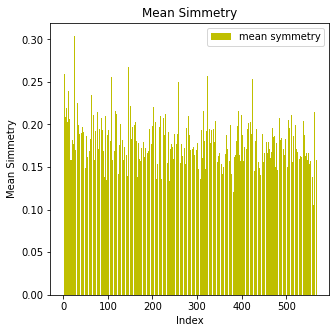

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.bar(np.arange(0, len(df['mean symmetry'])), df['mean symmetry'], color='y', label='mean symmetry')
axes.set_title('Mean Simmetry')
axes.set_xlabel('Index')
axes.set_ylabel('Mean Simmetry')
axes.legend()

Example of creating a Correlation Heatmap plot

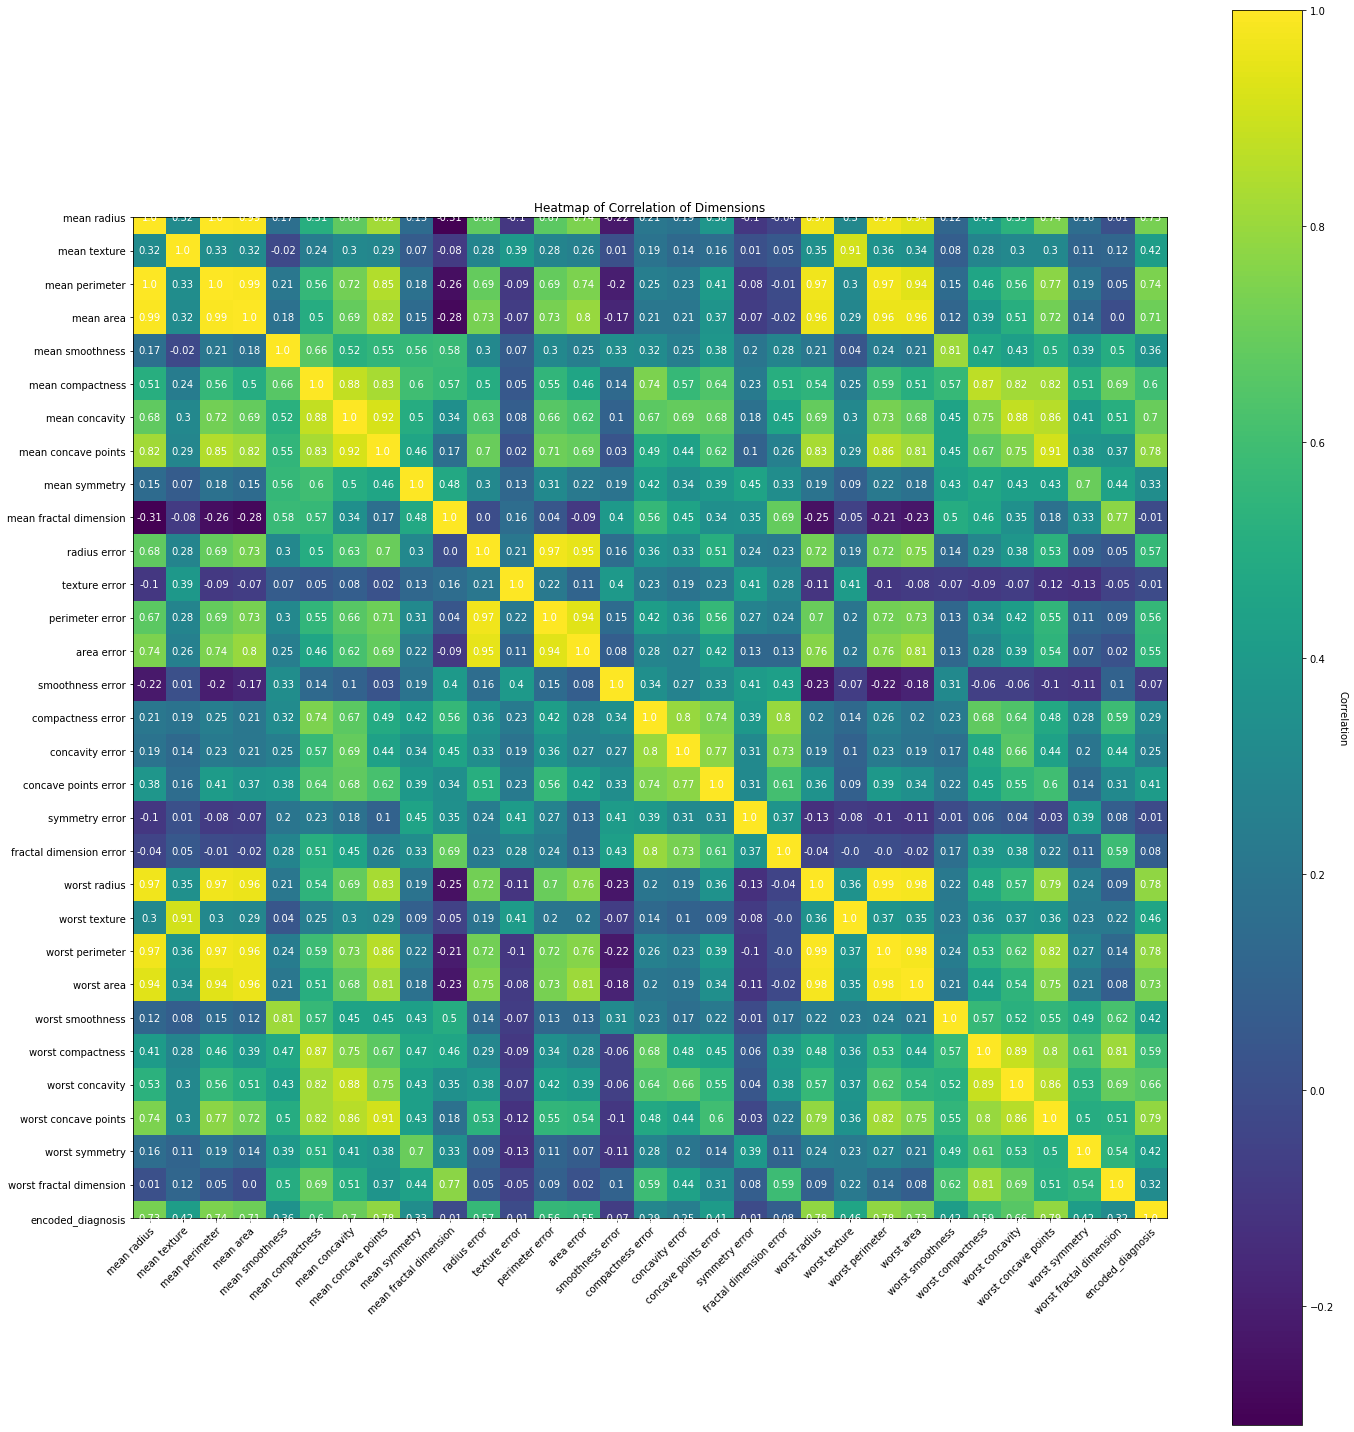

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(20, 20))
df['encoded_diagnosis']=df['diagnosis'].map({'B': 0, 'M': 1})
correlation = df.corr().round(2)
im = axes.imshow(correlation)
cbar = axes.figure.colorbar(im, ax=axes)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom")
numrows = len(correlation.iloc[0])
numcolumns = len(correlation.columns)
axes.set_xticks(np.arange(numrows))
axes.set_yticks(np.arange(numcolumns))
axes.set_xticklabels(correlation.columns)
axes.set_yticklabels(correlation.columns)
plt.setp(axes.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
for i in range(numrows):
    for j in range(numcolumns):
        text = axes.text(j, i, correlation.iloc[i, j], ha='center', va='center', color='w')
axes.set_title('Heatmap of Correlation of Dimensions')
fig.tight_layout()

Example of creating a 3D plot

Text(0.5, 0, 'mean concavity')

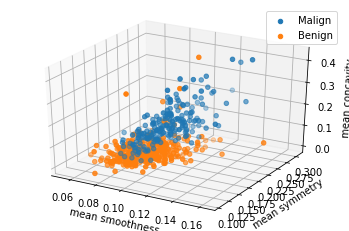

In [16]:
from mpl_toolkits.mplot3d import Axes3D

malign = df[df['diagnosis'] == 'M']
benign = df[df['diagnosis'] == 'B']
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1, projection='3d')
line1 = axes.scatter(malign['mean smoothness'], malign['mean symmetry'], malign['mean concavity'])
line2 = axes.scatter(benign['mean smoothness'], benign['mean symmetry'], benign['mean concavity'])
axes.legend((line1, line2), ('Malign', 'Benign'))
axes.set_xlabel('mean smoothness')
axes.set_ylabel('mean symmetry')
axes.set_zlabel('mean concavity')